## Prelim

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.linalg import fractional_matrix_power
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
import tensorflow as tf 
import keras

In [2]:
mymat = np.array([[0,0], [1,2], [2,3],[4,4]]).T #Notice the notation is different than the slides!

In [3]:
mymat

array([[0, 1, 2, 4],
       [0, 2, 3, 4]])

In [4]:
mymat.shape

(2, 4)

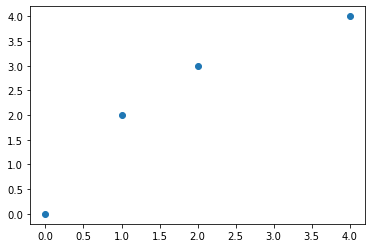

In [5]:
plt.scatter(x = mymat[0,:], y = mymat[1,:])

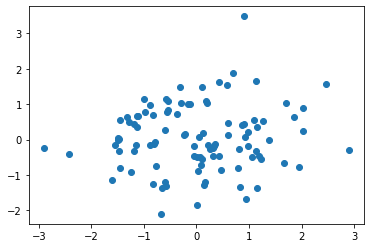

In [6]:
temp = np.random.multivariate_normal([0,0], [[1,0],[0,1]], size = 100)
plt.scatter(temp[:,0], temp[:,1])

## Correlations & Covariance & Normalization & Whitening

#### Covariance

In [7]:
np.cov(mymat, bias = True)

array([[2.1875, 2.0625],
       [2.0625, 2.1875]])

In [8]:
#Now manually!

mean_values = mymat.mean(axis = 1).reshape(-1,1)
mymat - mean_values
np.dot((mymat-mean_values) , (mymat - mean_values).T) /4 ### Notice this is using dividing by n

array([[2.1875, 2.0625],
       [2.0625, 2.1875]])

#### Correlation

In [9]:
np.corrcoef(mymat)

array([[1.        , 0.94285714],
       [0.94285714, 1.        ]])

In [10]:
2.0625/(np.std(mymat[0,:]) * np.std(mymat[1,:]))

0.9428571428571428

In [11]:
2.0625/(np.sqrt(2.1875)*np.sqrt(2.1875))

0.9428571428571428

#### Normalization

In [12]:
scaler = preprocessing.StandardScaler().fit(mymat.T) ###notice SK Learn does things in obs x features (not features x obs)
X_scaled = scaler.transform(mymat.T)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(mymat.T)

In [13]:
scaler.scale_

array([1.47901995, 1.47901995])

In [14]:
scaler.mean_

array([1.75, 2.25])

In [15]:
mymat

array([[0, 1, 2, 4],
       [0, 2, 3, 4]])

In [16]:
X_scaled.T

array([[-1.18321596, -0.50709255,  0.16903085,  1.52127766],
       [-1.52127766, -0.16903085,  0.50709255,  1.18321596]])

In [17]:
np.cov(X_scaled.T, bias = True)

array([[1.        , 0.94285714],
       [0.94285714, 1.        ]])

In [18]:
(1-1.75)/1.47901995

-0.5070925513885056

## Rotations

### PCA

In [19]:
x = np.linspace(0, 20, 40)
y = np.array([1.125*x + np.random.normal(loc = 0, scale = 2) for x in x])
pca_data = np.array([x,y])

In [20]:
pca_data.shape

(2, 40)

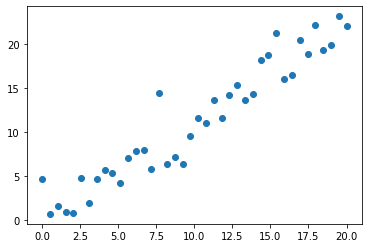

In [21]:
plt.scatter(x = pca_data[0,:], y = pca_data[1,:])

In [22]:
np.corrcoef(pca_data)


array([[1.        , 0.95580508],
       [0.95580508, 1.        ]])

In [23]:
scaler = preprocessing.StandardScaler().fit(pca_data.T)

In [24]:
scaler.mean_
scaler.scale_

array([5.91969045, 6.8258602 ])

Centered pca dims: (2, 40)


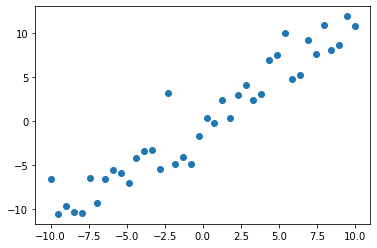

In [25]:
pca_centered = pca_data - scaler.mean_[:,None]
print("Centered pca dims: " + str(pca_centered.shape))
plt.scatter(x = pca_centered[0,], y = pca_centered[1,:])

In [26]:
np.dot(pca_centered, pca_centered.T)/pca_centered.shape[1] #Notice it matched before!

array([[35.04273504, 38.62119626],
       [38.62119626, 46.59236745]])

In [27]:
eigen_values, eigen_vectors = np.linalg.eig(np.cov(pca_centered, rowvar=True, bias=True).T)

#sort the eigenvectors and eigenvalues by size
idx = eigen_values.argsort()[::-1]    
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.65273251 -0.75758846]
 [-0.75758846  0.65273251]] 

Eigenvalues: 
 [79.86809929  1.7670032 ] 



In [28]:
PCA_transformed = np.dot(eigen_vectors.T, pca_centered)
PCA_transformed

array([[ 1.14939940e+01,  1.41928894e+01,  1.31368916e+01,
         1.33826879e+01,  1.31305321e+01,  9.77681215e+00,
         1.15662706e+01,  9.21686125e+00,  8.07981495e+00,
         7.98111871e+00,  8.53219322e+00,  6.06084739e+00,
         5.06623624e+00,  4.63407855e+00,  5.96612873e+00,
        -9.54324052e-01,  4.84941013e+00,  3.89965279e+00,
         4.16797271e+00,  1.47024420e+00, -4.03893129e-01,
        -3.53999420e-01, -2.68878845e+00, -1.41177805e+00,
        -3.72911824e+00, -4.91156628e+00, -3.97199831e+00,
        -4.84142941e+00, -8.10218751e+00, -8.90817981e+00,
        -1.10719954e+01, -7.45523183e+00, -8.13016090e+00,
        -1.15061876e+01, -1.06285606e+01, -1.35014999e+01,
        -1.16839076e+01, -1.24472640e+01, -1.52241572e+01,
        -1.46784087e+01],
       [ 3.29664008e+00,  2.94380382e-01,  5.27308429e-01,
        -3.61379568e-01, -8.21035809e-01,  1.39159235e+00,
        -8.27103289e-01,  5.20218376e-01,  8.22977178e-01,
         2.31101379e-01, -9.20

(-10.0, 10.0)

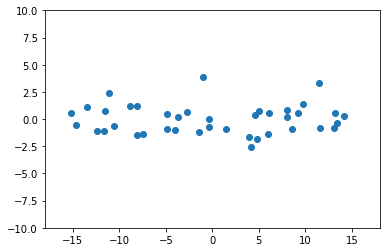

In [29]:
plt.scatter(x = PCA_transformed[0,:], y = PCA_transformed[1,:])
plt.xlim(-18,18)
plt.ylim(-10,10)

(-10.0, 10.0)

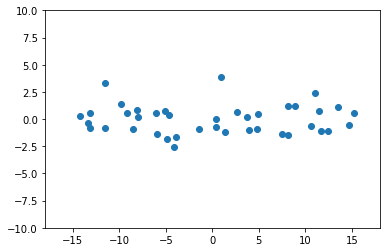

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(pca_data.T)

transformed_2 = pca.fit_transform(pca_data.T)
plt.scatter(x = transformed_2[:,0], y = transformed_2[:,1])
plt.xlim(-18,18)
plt.ylim(-10,10)

In [31]:
pca

PCA(n_components=2)

In [32]:
print(pca.explained_variance_ratio_)

[0.97835486 0.02164514]


In [33]:
(84.22845791)/(84.22845791+1.11756652)

0.9869054648126391

In [35]:

print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

print("SciKit Learn Results: \n" , pca.components_)

print("SciKit Learn variance: \n" , pca.explained_variance_)

Eigenvector: 
 [[-0.65273251 -0.75758846]
 [-0.75758846  0.65273251]] 

Eigenvalues: 
 [79.86809929  1.7670032 ] 

SciKit Learn Results: 
 [[ 0.65273251  0.75758846]
 [-0.75758846  0.65273251]]
SciKit Learn variance: 
 [81.91599927  1.81231097]


#### What happens if you only take one component?

In [39]:
modified_data = np.dot(eigen_vectors[:,0].T, pca_centered)
modified_data

array([ 15.86080936,  11.17238402,  15.62691555,  12.46663007,
        12.68399881,  10.2571527 ,  10.92789663,  10.45905296,
        10.13248235,   8.01871208,   6.95549238,   6.37640055,
         5.5289648 ,   2.73215241,   4.24087362,   4.8088733 ,
         3.24680629,   2.23879701,   1.39313848,   0.43735986,
         0.10125727,   0.69895323,  -1.40199203,  -3.19682819,
        -3.56320575,  -2.53770119,  -5.59781039,  -4.18357549,
        -5.51489272,  -8.02274199, -10.01669321,  -9.56441737,
        -9.87693238,  -8.33170041, -12.55683149, -13.55312808,
       -13.43640382, -15.3118178 , -12.21988971, -17.4785417 ])

In [42]:
pca_centered.shape

(2, 40)

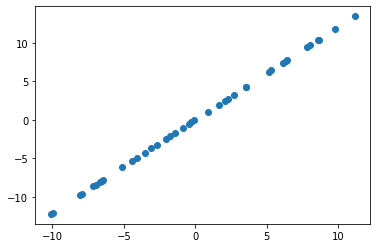

In [40]:
#Let's inverse the original eigenvector matrix, take the first component and multiply back through the modified data.
reset_results = np.dot(np.linalg.inv(eigen_vectors)[:,0].reshape(2,1), modified_data.reshape(modified_data.shape[0],1).T).T
plt.scatter(x = reset_results[:,0], y = reset_results[:,1])

### Whitening (and why we use it)

In [ ]:
sigma_half = fractional_matrix_power(np.cov(mymat, bias = True), -0.5)
sigma_half

In [ ]:
whitened_data = np.dot(sigma_half, mymat - mean_values)
whitened_data

In [ ]:
np.cov(whitened_data, bias = True) 

In [59]:
#### ZCA whitening
#borrowed heavily from  https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True, bias = True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-15
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix, sigma, U, S, V

In [ ]:
my_zca_transformer, _, _ , _, _ = zca_whitening_matrix(mymat)
my_zca_transformer

In [ ]:
my_zca_X = np.dot(my_zca_transformer, mymat-mean_values)
my_zca_X

In [ ]:
np.cov(my_zca_X, bias = True, rowvar = True) 

### This is cute and all, but why not just do PCA or some other orientation

In [46]:
#Let's use the famouse cifar-10 dataset
#https://www.cs.toronto.edu/~kriz/cifar.html

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [47]:
x_train.shape #this is way to big. My laptop will cry. 

(50000, 32, 32, 3)

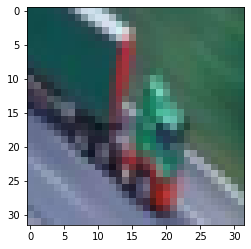

In [48]:
x_train_new = x_train[:5000, :, :, :]
plt.imshow(x_train_new[50,:,:,:])

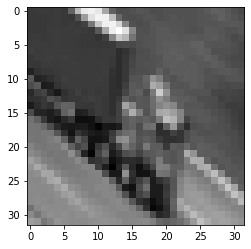

In [49]:
x_train_new = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_new]) # let's grayscale it
plt.imshow(x_train_new[50,:], cmap = "gray")

In [50]:
x_train_new.shape

(5000, 32, 32)

In [51]:
cifar_10_formatted = x_train_new.reshape(5000, 32**2).T
cifar_10_formatted_no_mean = cifar_10_formatted - np.mean(cifar_10_formatted, axis = 1)[:, None]
cifar_10_formatted_no_mean.shape

(1024, 5000)

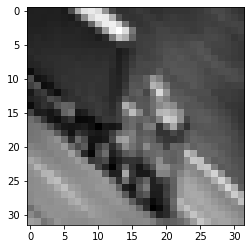

In [60]:
plt.imshow (cifar_10_formatted_no_mean[:, 50].reshape(32,32), cmap = "gray")

In [61]:
my_zca_transformer_image_stuff, _, _, _, _ = zca_whitening_matrix(cifar_10_formatted_no_mean)
cifar10_xZCA = np.dot(my_zca_transformer_image_stuff, cifar_10_formatted_no_mean)


In [63]:
my_zca_transformer_image_stuff.shape

(1024, 1024)

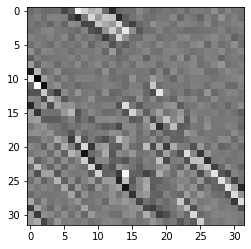

In [68]:
plt.imshow(cifar10_xZCA[:, 50].reshape(32,32), cmap = "gray")

In [64]:
np.cov(cifar10_xZCA, rowvar = True, bias = True)

array([[ 1.00000000e+00, -8.74091377e-12,  1.16800365e-12, ...,
        -2.55708343e-13,  3.14927817e-13, -2.17287344e-13],
       [-8.74091377e-12,  1.00000000e+00, -3.31769314e-12, ...,
         7.04253722e-13, -6.98895875e-13,  4.76005724e-13],
       [ 1.16800365e-12, -3.31769314e-12,  1.00000000e+00, ...,
        -2.26206254e-13,  2.73880474e-13, -1.00564401e-13],
       ...,
       [-2.55708343e-13,  7.04253722e-13, -2.26206254e-13, ...,
         1.00000000e+00, -2.65433897e-14,  6.20019591e-15],
       [ 3.14927817e-13, -6.98895875e-13,  2.73880474e-13, ...,
        -2.65433897e-14,  1.00000000e+00, -2.50867771e-14],
       [-2.17287344e-13,  4.76005724e-13, -1.00564401e-13, ...,
         6.20019591e-15, -2.50867771e-14,  1.00000000e+00]])

In [67]:
np.cov(cifar10_xZCA, rowvar = True, bias = True).shape

(1024, 1024)

In [ ]:
#### Let's get some puppies

In [69]:
new_size = 50

urls = ['https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
        'https://dogtime.com/assets/uploads/2018/10/puppies-cover.jpg',
         'https://www.readersdigest.ca/wp-content/uploads/2013/03/6-facts-to-know-before-owning-a-puppy.jpg',
          'https://images.newscientist.com/wp-content/uploads/2021/06/03141753/03-june_puppies.jpg']

puppies = []
for url in urls:
    r = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(r).read()
    arr = np.asarray(bytearray(response), dtype=np.uint8)
    puppies.append(cv2.imdecode(arr, 0)) # 'Load it as it is'

puppies_scaled = [cv2.resize(x, [new_size,new_size], interpolation = cv2.INTER_AREA) for x in puppies]
puppies_vectors = [x.reshape(new_size * new_size) for x in puppies_scaled]

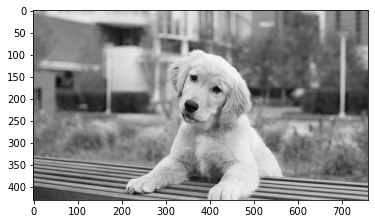

In [75]:
plt.imshow(puppies[1], cmap = "gray")

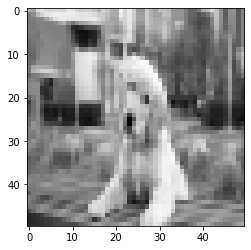

In [71]:
plt.imshow(puppies_scaled[1], cmap='gray')

In [76]:
puppies_clean = np.array(puppies_vectors).T
puppes_clean_no_mean = puppies_clean - np.mean(puppies_clean, axis = 1)[:, None]

In [77]:
puppes_clean_no_mean.shape

(2500, 4)

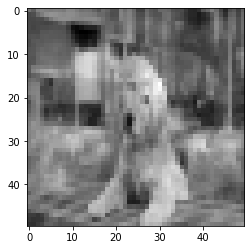

In [78]:
plt.imshow(puppes_clean_no_mean[:,1].reshape(new_size, new_size), cmap = "gray")

In [79]:
#ZCA whitened_picture
my_zca_transformer_image_stuff, sig, u1, s1, v1 = zca_whitening_matrix(puppes_clean_no_mean)


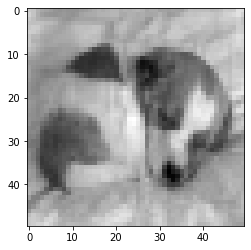

In [83]:
puppies_xZCA = np.dot(my_zca_transformer_image_stuff, puppes_clean_no_mean)
puppies_whitened_pics = [puppies_xZCA[:,i].reshape(new_size,new_size) for i in range(len(urls))]
plt.imshow(puppies_whitened_pics[2], cmap='gray')


In [84]:
np.cov(puppies_xZCA, rowvar = True, bias = True)  

array([[0.00066031, 0.00056214, 0.00050178, ..., 0.00027655, 0.00028193,
        0.0003047 ],
       [0.00056214, 0.00086707, 0.00075171, ..., 0.00022508, 0.00018811,
        0.00019766],
       [0.00050178, 0.00075171, 0.00092065, ..., 0.00030842, 0.00037329,
        0.00043871],
       ...,
       [0.00027655, 0.00022508, 0.00030842, ..., 0.00015871, 0.00020013,
        0.00023238],
       [0.00028193, 0.00018811, 0.00037329, ..., 0.00020013, 0.00028002,
        0.00033357],
       [0.0003047 , 0.00019766, 0.00043871, ..., 0.00023238, 0.00033357,
        0.00039998]])

### Bonus points 3% 

-Why are the off-diagonals not 0?
-3% extra credit for formal proof. 

## PCA by hand (on CIFAR10)

In [53]:
covariance_matrix = np.cov(cifar_10_formatted_no_mean, bias = True, rowvar = True)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.05014274 -0.03148925 -0.03086019 ...  0.01201104 -0.0186586
  -0.00517942]
 [-0.04993266 -0.03190975 -0.02996241 ... -0.04185594 -0.01626944
   0.03226982]
 [-0.04992499 -0.0324719  -0.02928304 ...  0.01159085  0.02026695
  -0.07660374]
 ...
 [-0.02779202  0.0392182  -0.04034409 ...  0.01109606  0.00367269
  -0.02320235]
 [-0.02835436  0.03756079 -0.04028345 ... -0.01403377 -0.02354542
  -0.00616369]
 [-0.02889157  0.03587282 -0.04023985 ...  0.00964296  0.01553135
   0.01130603]] 

Eigenvalues: 
 [1.23670327e+06 4.70823404e+05 2.79173056e+05 ... 1.36960878e+01
 1.34278616e+01 1.31708188e+01] 



#### PCA completely changes the basis

In [54]:
PCA_data = np.dot(eigen_vectors.T, cifar_10_formatted_no_mean)
PCA_data

array([[ 1.06953225e+03, -1.25974952e+02, -1.17565426e+03, ...,
        -1.17903747e+02, -1.01318895e+03,  1.65098695e+03],
       [ 3.02581037e+02, -1.08052977e+02, -1.62307403e+03, ...,
        -6.46980713e+02,  4.22759067e+02,  5.25187685e+02],
       [ 3.75909181e+02,  9.30511180e+02, -3.56158469e+02, ...,
        -1.44508088e+02,  1.09691675e+02, -4.07688462e+02],
       ...,
       [ 1.20588583e+00,  6.47609243e+00, -3.50600751e+00, ...,
        -9.14523348e+00, -6.73066401e-01, -4.58485817e-01],
       [ 4.62660928e+00, -8.22211448e+00, -1.52999437e+00, ...,
        -2.53209603e+00, -4.79662350e+00,  6.65195957e+00],
       [ 1.05499076e+00,  8.94659903e+00,  1.76556863e+00, ...,
        -1.44566762e+00,  7.96913530e+00,  3.57725790e+00]])

In [55]:
PCA_data.shape

(1024, 5000)

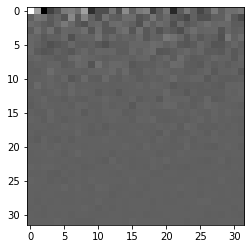

In [58]:
plt.imshow(PCA_data[:,50].reshape(32,32),  cmap='gray')

In [56]:
np.cov(PCA_data, rowvar= True, bias = True)

array([[ 1.23670327e+06,  4.76092100e-10, -2.15694308e-10, ...,
        -3.42915882e-11,  5.76994353e-11,  1.07829692e-11],
       [ 4.76092100e-10,  4.70823404e+05, -1.12503767e-10, ...,
        -4.36775736e-12, -2.42827809e-11, -1.78129994e-11],
       [-2.15694308e-10, -1.12503767e-10,  2.79173056e+05, ...,
         1.02736522e-11,  4.59258445e-12,  1.32524292e-11],
       ...,
       [-3.42915882e-11, -4.36775736e-12,  1.02736522e-11, ...,
         1.36960878e+01, -2.79473142e-11,  7.46720502e-11],
       [ 5.76994353e-11, -2.42827809e-11,  4.59258445e-12, ...,
        -2.79473142e-11,  1.34278616e+01, -6.62079174e-12],
       [ 1.07829692e-11, -1.78129994e-11,  1.32524292e-11, ...,
         7.46720502e-11, -6.62079174e-12,  1.31708188e+01]])

In [57]:
np.cov(PCA_data, rowvar= True, bias = True).shape

(1024, 1024)

In [ ]:
# more information:
#https://stats.stackexchange.com/questions/117427/what-is-the-difference-between-zca-whitening-and-pca-whitening